In [1]:
# 数据处理
import pandas as pd
import numpy as np
import json
import csv
import random
import math
from itertools import product


# 网络分析与可视化
import networkx as nx
from networkx.readwrite import json_graph
from pyvis import network as net
import matplotlib.pyplot as plt
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α

In [2]:
def get_children(df, row_name):
    classes = set()
    for i, row in df.iterrows():
        classes.add(row[row_name])
    return classes


# 查看节点Degree分布
def NodeDegreeHist(G):
    # degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    # dmax = max(degree_sequence)
    # plt.hist(degree_sequence)
    # plt.show()
    degree = nx.degree_histogram(G)  # 返回图中所有节点的度分布序列
    x = range(len(degree))  # 生成X轴序列，从1到最大度
    y = [z / float(sum(degree)) for z in degree]  # 将频次转化为频率
    plt.scatter(x, y, s=1, color=(1, 0, 0))  # 绘制度分布
    plt.show()  # 显示图表


# 查看连接Weight分布
def EdgeWeightHist(G):
    weight_sequence = sorted([e['weight'] for u,v,e in G.edges(data=True)], reverse=True)
    dmax = max(weight_sequence)
    plt.hist(weight_sequence)
    plt.show()


# 查看全部节点在某个属性的所有选项
def NodeAttributeValueList(G,attribute):
    return set(np.array([G.nodes[n][attribute] for n in G.nodes]).flatten())


# 搜索满足某个属性值的所有节点
def NodeMatchByAttribute(G,attribute,value):
    nodes = []
    for n in G.nodes:
        if G.nodes[n][attribute]==value:
            nodes.append(n)
    return nodes

In [ ]:
# Neighbors / Path / Node Attributes ......

In [8]:
with open('02_Graph/MasterConceptNetwork.json') as f:
    js_graph = json.load(f)
    G_MasterConceptNetwork = json_graph.node_link_graph(js_graph)

Node Degree Hist


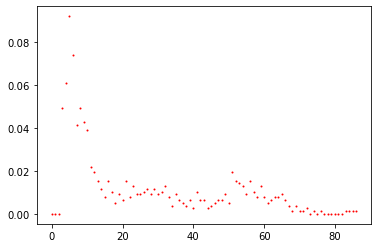

Edge Weight Hist


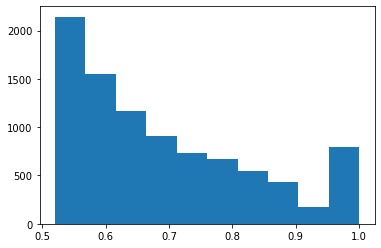

In [9]:
print("Node Degree Hist")
NodeDegreeHist(G_MasterConceptNetwork)
print("Edge Weight Hist")
EdgeWeightHist(G_MasterConceptNetwork)

In [6]:
for path in sorted(nx.all_simple_edge_paths(G_MasterConceptNetwork, '拇指', '老虎', cutoff=3)):
    print(path)

KeyboardInterrupt: 

In [15]:
nx.multi_source_dijkstra(G_MasterConceptNetwork, {'轿车', '拇指'},'白菜', weight='weight')

(7.6214354038238525,
 ['轿车',
  '摩托车',
  '消防车',
  '消防栓',
  '水枪',
  '水',
  '纯净水',
  '白水',
  '冰红茶',
  '乌龙茶',
  '决明子',
  '谷子',
  '薄荷',
  '白菜'])